Project Title: Analysis of Stats in the League of Legends Pro Scene

In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
champions_data = pandas.read_csv('Game_stats_by_champion_-_Game_stats_by_champion_-_League_of_Legends.csv')
top_lane_champion = pandas.read_csv('Top Lane Champion .csv')
mid_lane_champion = pandas.read_csv('Middle_Lane_Champion.csv')
ad_champion = pandas.read_csv('AD Champion.csv')
sup_champion = pandas.read_csv('Support Champion.csv')
jungle_champion = pandas.read_csv('Jungle Champion.csv')
t1_match_history = pandas.read_csv('T1_games.csv')
champions_data_world_competition = pandas.read_csv('champions_data_at_World_Championship_2022.csv')

**Research Question**: We gathered data for soloq as well as professional League tournaments. We gathered champion data from op.gg. All the characters have their own special interactions with other champions. There are features that may make the game more likely to be won. And these characteristics are generally reflected in some data. For example, there is acquisition of gold in total games and there is CS for the game, which means the number of minions and monsters that the character has killed in total games. So first our group want to use the data we got from the website to study the impact of these two data on the win rate. This data has a great impact on the economy of a game and the equipment of the characters. So our group considers this to be a very important piece of information.

In [2]:
champions_data['Win rate'] = champions_data['Win rate'].map(lambda s : float(s.replace("%","")))
champions_data['Gold'] = champions_data['Gold'].map(lambda s : int(s.replace(",","")))
champions_data

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold
0,1,Kai'Sa,"5,043,800",2.47:1,49.92,24.65%,6.99%,197.14,12384
1,2,Miss Fortune,"4,866,151",2.36:1,51.91,23.78%,19.37%,178.82,12026
2,3,Caitlyn,"4,154,060",2.25:1,49.49,20.30%,14.35%,186.79,12191
3,4,Lux,"3,737,410",2.55:1,50.47,18.27%,10.47%,77.28,9830
4,5,Ezreal,"3,584,686",2.46:1,48.66,17.52%,4.09%,181.21,11854
...,...,...,...,...,...,...,...,...,...
157,158,Corki,"213,608",2.1:1,46.96,1.04%,0.18%,192.73,12689
158,159,K'Sante,"178,752",1.48:1,39.52,7.81%,12.49%,157.62,10236
159,160,Skarner,"139,417",2.75:1,50.79,0.68%,0.10%,144.23,10541
160,161,Ivern,"127,397",2.98:1,47.39,0.62%,0.32%,112.35,9256


(array([ 7000.,  8000.,  9000., 10000., 11000., 12000., 13000., 14000.,
        15000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

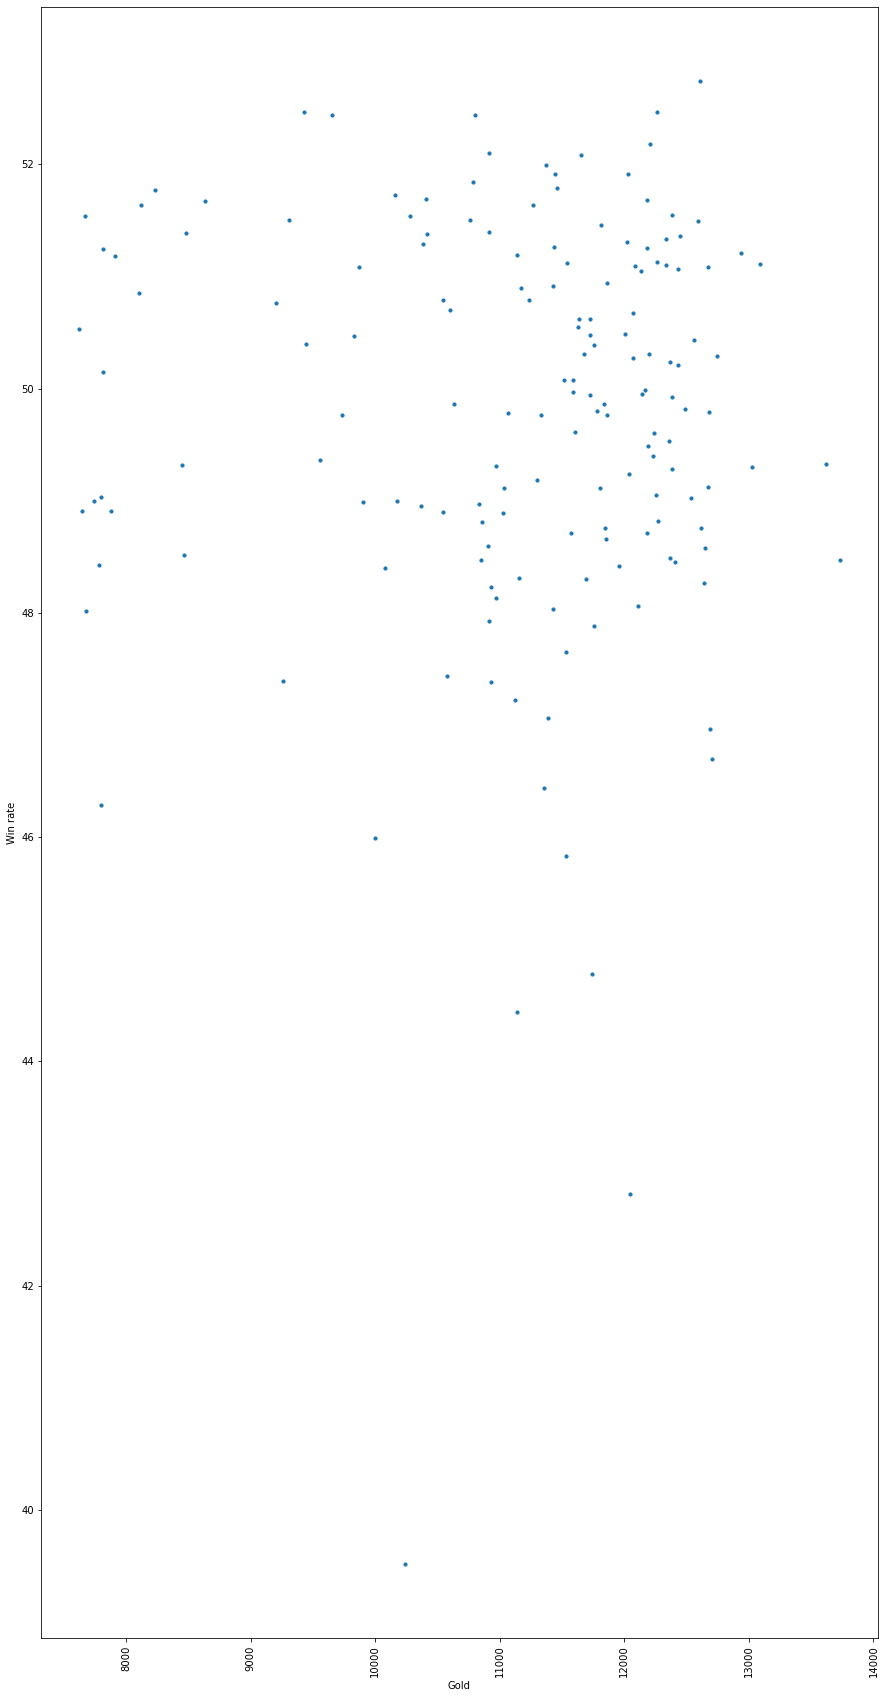

In [3]:
champions_data.plot.scatter(x='Gold', y = 'Win rate', s = 10, figsize =(15, 30))
plt.xticks(rotation=90)

Based on the data we obtained and the analysis of Gold and Win rate data as well as the graphing of the integrated data, we found that the division of the data was not very reasonable. Because when some characters get very little gold, their win rate is similar to that of heroes with high gold. And there are also heroes with very high gold acquisition, but the win rate is very low. This is not the same as the assumptions we made at the beginning of the research and there is a big difference. At the beginning we assumed that the more Gold we get, the better the character's economy will be. Then the probability of winning the game will be higher. But the results from the plot are not the same. This made us very confused. And we planned to analyze the next data first before discussing the results. 

<AxesSubplot:xlabel='CS', ylabel='Win rate'>

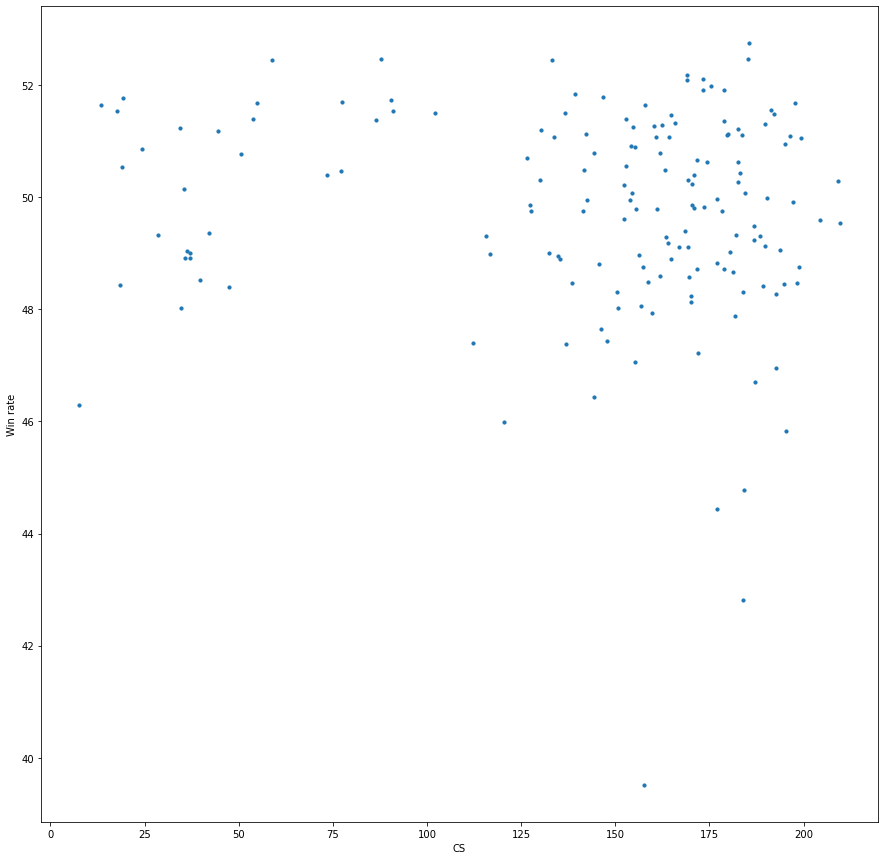

In [4]:
champions_data.plot.scatter(x='CS', y = 'Win rate', s = 10, figsize =(15, 15))

So our group went on to analyze the CS data and the Win rate of the characters. However, the results we obtained at this time were as unreasonable as the plots and analyses of Gold and Win rate. The plots of the CS data and the Win rates of the characters showed highly similar results to the plots of Gold and Win rates. When some characters have lower CS, their win rate is at the same level as those with higher CS. This is a big difference from our guess. So we started to wonder if the CS and Gold factors had a mutual influence or if there was a correlation between the two that affected the win rate. So to resolve the anomalous results above, our team then decided to check if there was a mutual relationship between CS and Gold. Based on the results obtained, the strange correlation between CS and Gold on the Win rate was solved. 

<AxesSubplot:xlabel='CS', ylabel='Gold'>

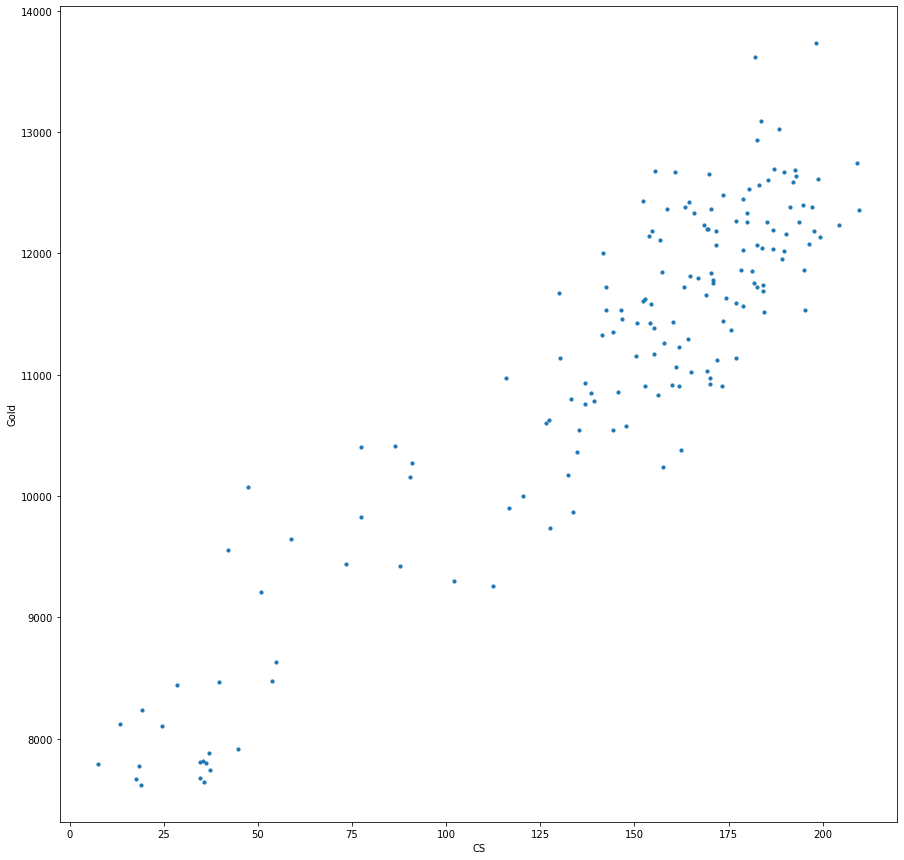

In [5]:
champions_data.plot.scatter(x='CS', y = 'Gold', s = 10, figsize =(15, 15))

By analyzing the relationship between CS and Gold, we found that the Gold and CS numbers are relatively normal, because for world champion 2022 and the game, killing other characters and pushing towers is a way to get Gold.  But the number of minions and the amount of monsters are the source of most of the gold. According to the images obtained, when a character's CS is low then the gold rate is low, when a character's CS is high then the gold is also high. Therefore, this data set is very normal, indicating that the CS and Gold of each character are increasing steadily in a linear form. Our group questioned whether CS and Gold were not a factor in the win rate. But after thinking about the characters, our team came to the conclusion that there are secondary positions in each game for this game. Most of the players in this position do not have high CS and Gold, and they need to give up this part of their economy to others in order to win or lose the whole game. Although the CS and Gold of these roles are low, they also play a big role in the game, such as vision score and control score. Even though the CS and Gold stats of these characters are not very high, these heroes have a high win rate. So our team decided to exclude these heroes from the data first. We intend to create a new dataframe to carry out our analysis of the effect of CS and Gold on Win rate. At this point a new problem arises, because some characters can play as support in one game, and then play as mid or top in other games. So how to filter the support roles is a problem. But by looking at the data and analyzing the data, and the characteristics of the support, the support will usually give up the minions or monsters to the teammates in the game. So we found that for CS, if the character has no more than 100 CS in the game, then the character will be the secondary character. So when we create a new dataframe, we only put characters with CS above 100 into the new dataframe for later analysis. 

In [6]:
champions_data_no_sup = champions_data[champions_data['CS'] >= 100]
champions_data_no_sup = champions_data_no_sup.sort_values(by='CS', ascending=False)
champions_data_no_sup

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold
60,61,Sivir,"1,391,635",2.44:1,49.53,6.80%,4.03%,209.66,12356
34,35,Irelia,"1,913,633",1.73:1,50.29,9.35%,16.34%,209.21,12744
109,110,Kayle,"664,971",1.83:1,49.60,3.25%,0.98%,204.43,12235
93,94,Sion,"879,934",1.66:1,51.05,4.30%,0.83%,199.23,12135
100,101,Tryndamere,"721,138",1.77:1,48.76,3.52%,3.44%,198.88,12615
...,...,...,...,...,...,...,...,...,...
143,144,Annie,"419,915",2.1:1,45.99,2.05%,0.58%,120.53,9999
135,136,Tahm Kench,"510,588",2.38:1,48.99,2.50%,1.02%,116.69,9902
61,62,Pantheon,"1,335,035",2.16:1,49.31,6.52%,1.45%,115.80,10970
160,161,Ivern,"127,397",2.98:1,47.39,0.62%,0.32%,112.35,9256


So next we will do the same data analysis with the new daraframe as in the previous plots. The first one will do the CS and win rate analysis, then the Gold and win rate analysis, and then the CS and gold analysis to see if there is a correlation if there is a problem.

<AxesSubplot:xlabel='CS', ylabel='Win rate'>

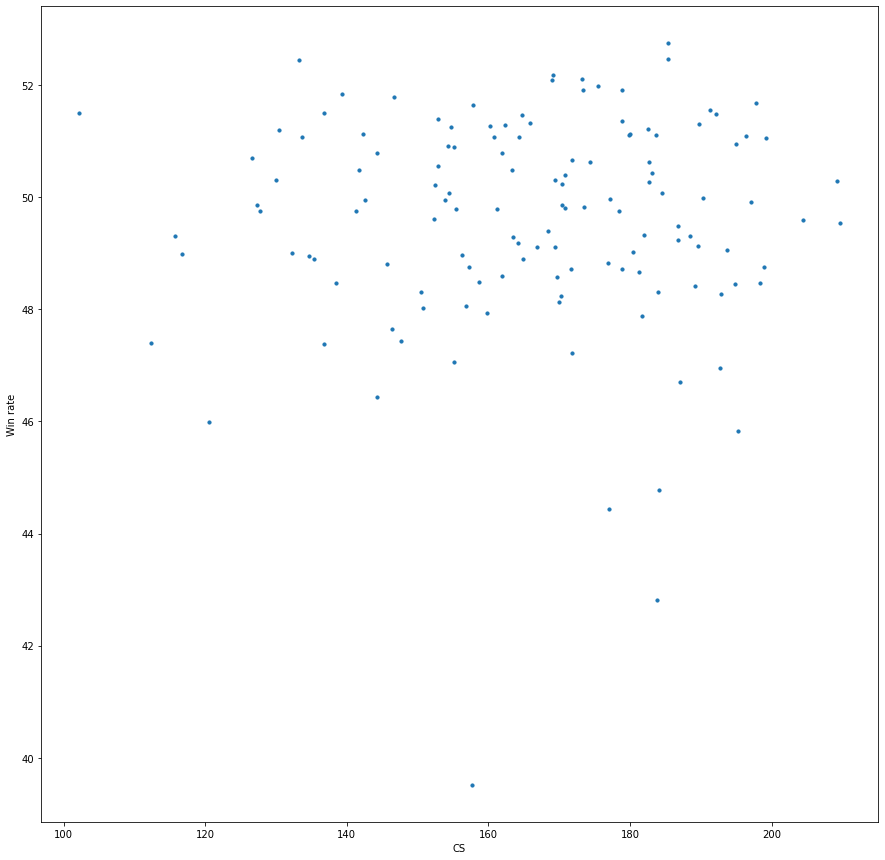

In [7]:
champions_data_no_sup.plot.scatter(x='CS', y = 'Win rate', s = 10, figsize =(15, 15))

(array([ 9000., 10000., 11000., 12000., 13000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

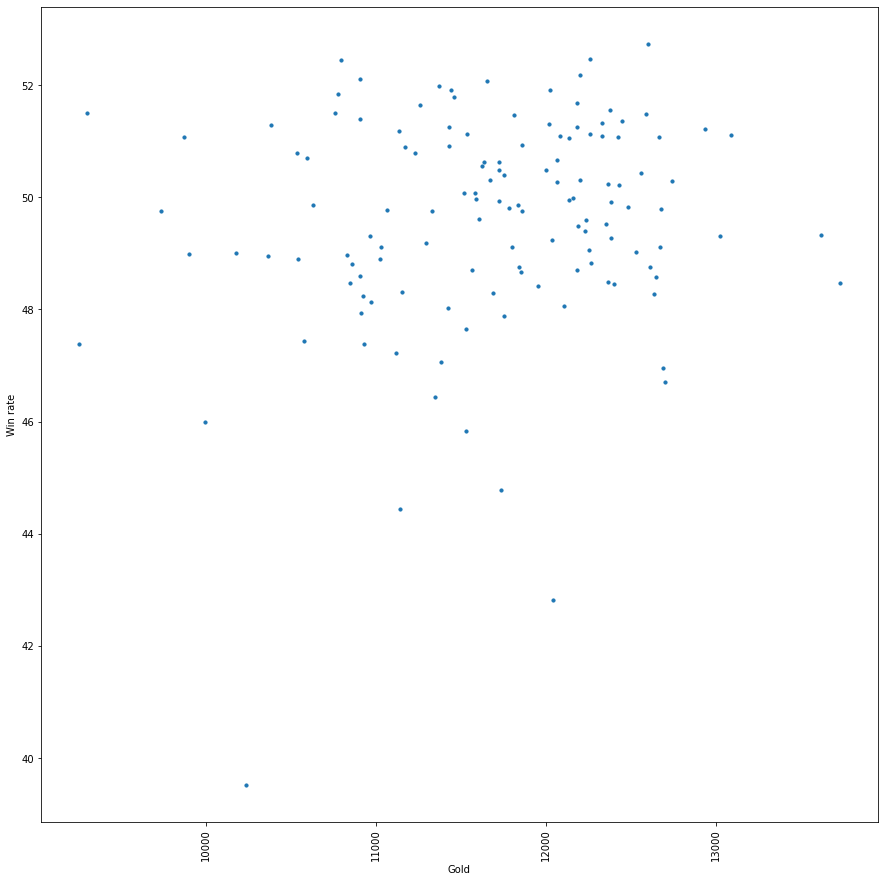

In [8]:
champions_data_no_sup.plot.scatter(x='Gold', y = 'Win rate', s = 10, figsize =(15, 15))
plt.xticks(rotation=90)

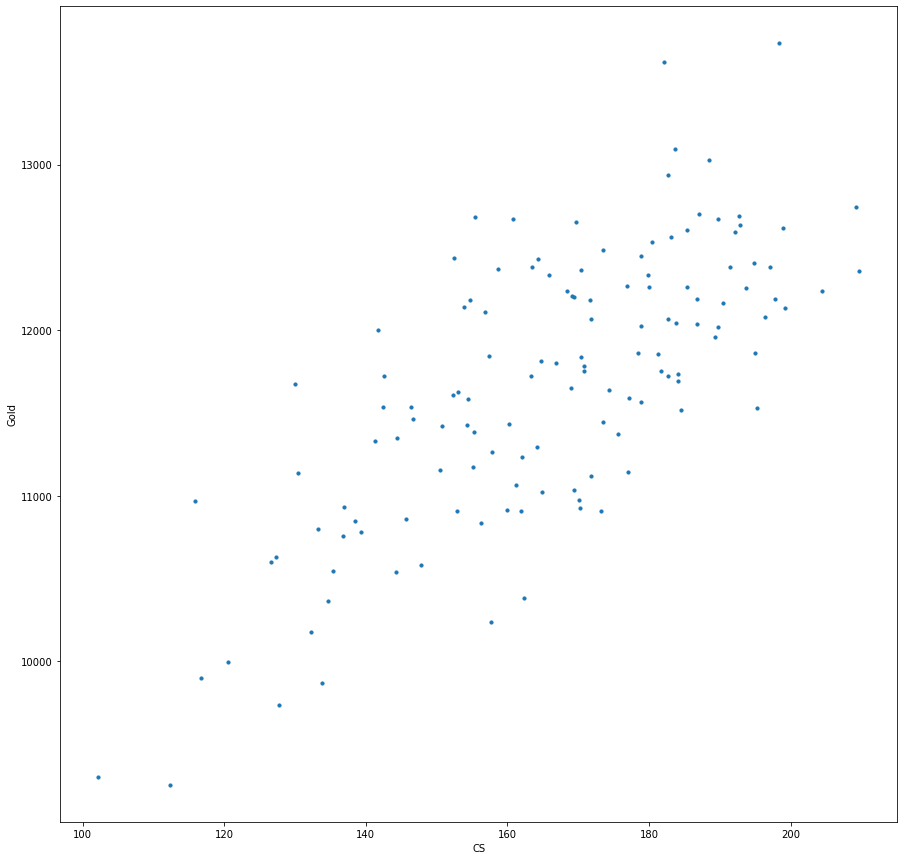

In [9]:
ax = champions_data_no_sup.plot.scatter(x='CS', y = 'Gold', s = 10, figsize =(15, 15))

After plotting again for CS and Gold for win rate, our group got similar results as before. For the x-axis variables, gold and CS, the change in value for the y-axis win rate was not as linear as we had assumed at the beginning. The result is not that the higher the CS and gold, the higher the win rate of the character. The result shown by our group is that the number of CS and Gold of the other position individual characters is not critical to the win rate when there is no secondary character. So we plotted the relationship between CS and gold again. The relationship between the plots without the support role is not much different from the above plots with the support role. When the x-axis grows, the y-axis also grows linearly. So CS and Gold are also proportional to each other for roles that are not support. The more CS, the more minions and monsters you kill, the more Gold you get. Therefore, the relationship between CS and Gold is closely related. But the CS and Gold of individual characters are not the key to the win rate. After thinking and studying as a group, our group found out the problems and patterns. So our team concluded based on the plot and all the data results. For CS and Gold, there is no correlation between CS with win rate, and Gold with win rate for a single character. In a game, a team has five different roles. So in a game, the win rate for gold and CS is calculated with the five heroes as a whole. However, the first part of the analysis and the analysis without the support role are the calculations for the individual Gold and CS. Therefore, the results that the team expects from their plots and data are not available. That is, the CS and Gold of individual characters have a certain correlation to the win rate.

For all the data above, Every champion has their corresponding Gold and CS. However, a mtach has five champion. That is also why the graph above do not have a strong correlation. In order to find the correlation betweeen the gold and win rate, we need to consider it as a whole match. Therefore, we refer the pro competition to find out the correlation.

In [10]:
pro_game_dataframe = t1_match_history.copy()
list_gold = []
list_win_rate = []
gold = 0
win_rate = 0.00

for w in t1_match_history['Picks Champions']:
    for i in range(5):
        gold = gold + int(champions_data[champions_data['Champion'] == w.split(',')[i]]['Gold'])
        win_rate = win_rate + float(champions_data[champions_data['Champion'] == w.split(',')[i]]['Win rate'])
    list_gold.append(gold)
    list_win_rate.append(win_rate / 5)
    gold = 0
    win_rate = 0.00
pro_game_dataframe['Gold In a Game'] = list_gold
pro_game_dataframe['Average Win Rate'] = list_win_rate
pro_game_dataframe

,Tournament,W/L,Side,Bans Champions,Picks Champions,Players,Gold In a Game,Average Win Rate
0,"International,Worlds 2022 Main Event",Win,Red,"Yuumi,Aatrox,Graves,Taliyah,Ashe","Gragas,Viego,Azir,Varus,Renata Glasc","Zeus,Oner,Faker,Gumayusi,Keria",54206,48.102
1,"International,Worlds 2022 Main Event",Win,Red,"Yuumi,Aatrox,Graves,Taliyah,Galio","Gangplank,Nocturne,Ryze,Lucian,Nami","Zeus,Oner,Faker,Gumayusi,Keria",58350,49.108
2,"International,Worlds 2022 Main Event",Win,Blue,"Sejuani,Viego,Aatrox,Vi,Renekton","Yone,Poppy,Ryze,Lucian,Nami","Zeus,Oner,Faker,Gumayusi,Keria",54693,48.786
3,"International,Worlds 2022 Main Event",Loss,Blue,"Sejuani,Sylas,Aatrox,Ornn,Renekton","Camille,Vi,Galio,Lucian,Nami","Zeus,Oner,Faker,Gumayusi,Keria",53185,50.000
4,"International,Worlds 2022 Main Event",Win,Red,"Yuumi,Lissandra,Fiora,Kai'Sa,Lucian","Yone,Sejuani,Akali,Varus,Tahm Kench","Zeus,Oner,Faker,Gumayusi,Keria",56542,49.392
5,"International,Worlds 2022 Main Event",Win,Red,"Lissandra,Aatrox,Yuumi,Aphelios,Tristana","Jayce,Viego,Akali,Xayah,Renata Glasc","Zeus,Oner,Faker,Gumayusi,Keria",55465,48.958
6,"International,Worlds 2022 Main Event",Win,Blue,"Lissandra,Fiora,Jax,Galio,Taliyah","Camille,Graves,Viktor,Ashe,Heimerdinger","Zeus,Oner,Faker,Gumayusi,Keria",57184,50.502
7,"International,Worlds 2022 Main Event",Win,Red,"Yuumi,Caitlyn,Fiora,Akali,Viego","Gangplank,Sejuani,Viktor,Kalista,Soraka","Zeus,Oner,Faker,Gumayusi,Keria",56982,49.682
8,"International,Worlds 2022 Main Event",Win,Blue,"Viktor,Azir,Renata Glasc,Alistar,Draven","Jayce,Sejuani,Sylas,Lucian,Nami","Zeus,Oner,Faker,Gumayusi,Keria",54483,49.708
9,"International,Worlds 2022 Main Event",Win,Blue,"Azir,Viktor,Renata Glasc,LeBlanc,Renekton","Yone,Sejuani,Sylas,Sivir,Yuumi","Zeus,Oner,Faker,Gumayusi,Keria",53959,49.054


In [11]:
linear_regressor = LinearRegression()
linear_regressor.fit(pro_game_dataframe['Gold In a Game'].values.reshape(-1, 1), pro_game_dataframe['Average Win Rate'].values.reshape(-1, 1))
Y_pred = linear_regressor.predict(pro_game_dataframe['Gold In a Game'].values.reshape(-1, 1))
pro_game_dataframe['Predict_Gold_Win_Rate'] = Y_pred

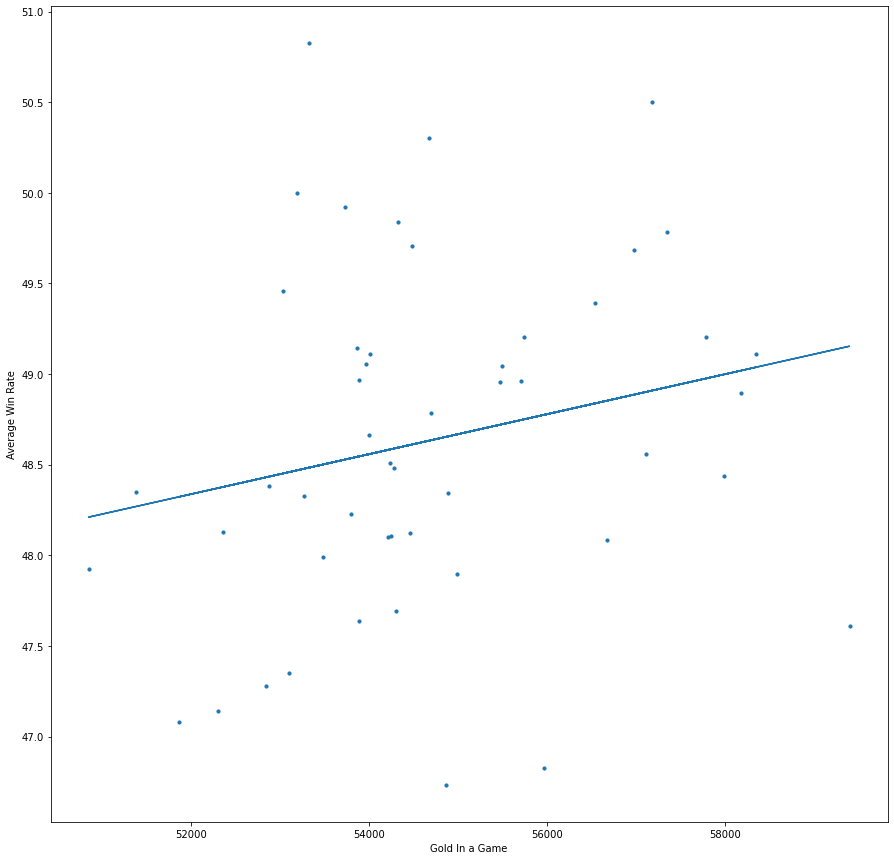

In [12]:
ax = pro_game_dataframe.plot.scatter(x='Gold In a Game', y = 'Average Win Rate', s = 10, figsize =(15, 15))
ax.add_line(matplotlib.lines.Line2D(pro_game_dataframe['Gold In a Game'], pro_game_dataframe['Predict_Gold_Win_Rate']))

We refer the champion from the competition, add all the gold of each champion and find the average of win rate for those combination. The graph above is showing the correaltion. However, it doesn't seems to have a very strong correlation. There is reason. Getting more gold in LOL means they have good finacal and they can win with the finacal advantage. However, the data above is only related to one team. What if another team has more gold than this team?

Therefore, we will do gold differential, which means the difference gold between two teams, instead of total gold in a game. However, some champion has never been picked up in competition. We will filter those champion with 0 picks in order to use this data. Also, support champion doesn't have high gold but still have high win rate, so we need to filter out support chmapion by CS per min, which has to be at least more than 2.

In [13]:
champions_data_world_competition_picks = champions_data_world_competition[champions_data_world_competition['Picks'] > 2]
champions_data_world_competition_picks['Gold differential at 15 minutes'].map(float)
champions_data_world_competition_picks['Winrate'] = champions_data_world_competition_picks['Winrate'].map(lambda k : float(k.replace("%","")))
champions_data_world_competition_picks['Picks'].map(int)
champions_data_world_competition_picks['CS per minute'].map(float)

C:\Users\Kam Wai Chan\AppData\Local\Temp\ipykernel_9944\3616195103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champions_data_world_competition_picks['Winrate'] = champions_data_world_competition_picks['Winrate'].map(lambda k : float(k.replace("%","")))


0     8.3
1     0.2
2     5.8
3     9.3
4     9.4
     ... 
63    6.5
64    8.0
65    7.5
68    6.3
71    9.5
Name: CS per minute, Length: 66, dtype: float64

In [14]:
champions_data_world_competition_picks = champions_data_world_competition_picks[champions_data_world_competition['CS per minute'] > 2]
champions_data_world_competition_picks

C:\Users\Kam Wai Chan\AppData\Local\Temp\ipykernel_9944\3671071763.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  champions_data_world_competition_picks = champions_data_world_competition_picks[champions_data_world_competition['CS per minute'] > 2]


,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avgerage ban turn,Average game time,CS per minute,Damage to champions per minute,Gold per minute,CS differential at 15 minutes,Gold differential at 15 minutes,XP differential at 15 minutes,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Aatrox,18,57,100%,10.0,8.0,56.0,2.7,4.1,30:58:00,8.3,483.0,387.0,11.3,210.0,235.0,NaN,NaN,NaN
2,Sejuani,29,38,89%,16.0,13.0,55.0,3.7,4.4,31:15:00,5.8,370.0,337.0,-5.7,-12.0,-36.0,NaN,NaN,NaN
3,Caitlyn,7,58,87%,4.0,3.0,57.0,3.4,3.3,31:47:00,9.3,486.0,421.0,-3.0,-232.0,-280.0,NaN,NaN,NaN
4,Azir,33,28,81%,15.0,18.0,45.0,4.1,3.9,31:26:00,9.4,638.0,421.0,8.1,193.0,275.0,NaN,NaN,NaN
5,Sylas,29,28,76%,20.0,9.0,69.0,3.8,3.9,30:07:00,8.6,499.0,420.0,-5.2,1.0,-53.0,NaN,NaN,NaN
6,Graves,23,33,75%,11.0,12.0,48.0,4.1,4.1,31:55:00,7.3,444.0,402.0,14.2,552.0,523.0,NaN,NaN,
7,Maokai,20,35,73%,6.0,14.0,30.0,2,3.9,29:38:00,6.1,448.0,309.0,-14.8,-732.0,-549.0,NaN,NaN,NaN
8,Lucian,26,24,67%,15.0,11.0,58.0,6.1,4.3,31:04:00,9.5,714.0,478.0,6.4,432.0,270.0,NaN,NaN,NaN
9,Akali,23,20,57%,12.0,11.0,52.0,3.4,6.4,30:50:00,8.4,509.0,396.0,1.9,61.0,74.0,NaN,NaN,NaN
10,Viego,26,17,57%,18.0,8.0,69.0,4.5,6.4,30:54:00,5.5,312.0,363.0,2.0,245.0,72.0,NaN,NaN,NaN


In [15]:
linear_regressor = LinearRegression()
linear_regressor.fit(champions_data_world_competition_picks['Gold differential at 15 minutes'].values.reshape(-1, 1), champions_data_world_competition_picks['Winrate'].values.reshape(-1, 1))
Y_pred = linear_regressor.predict(champions_data_world_competition_picks['Gold differential at 15 minutes'].values.reshape(-1, 1))
champions_data_world_competition_picks['Predict_GoldDifferential_Win_Rate'] = Y_pred

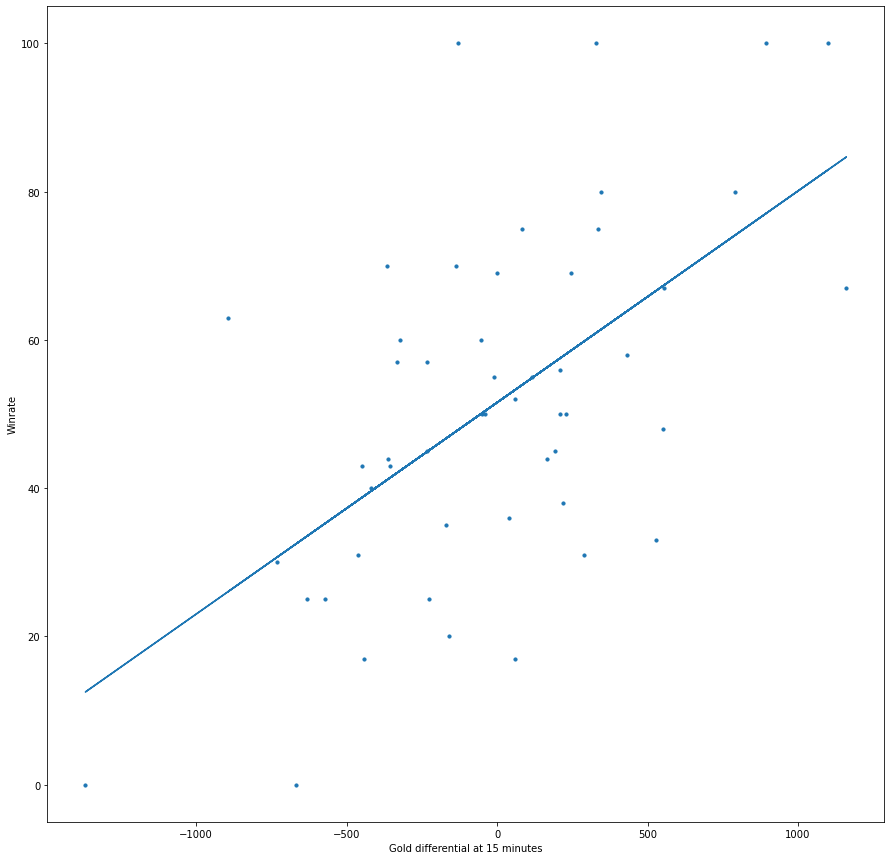

In [16]:
gp = champions_data_world_competition_picks.plot.scatter(x='Gold differential at 15 minutes', y = 'Winrate', s = 10, figsize =(15, 15))
gp.add_line(matplotlib.lines.Line2D(champions_data_world_competition_picks['Gold differential at 15 minutes'], champions_data_world_competition_picks['Predict_GoldDifferential_Win_Rate']))

<AxesSubplot:xlabel='CS differential at 15 minutes', ylabel='Winrate'>

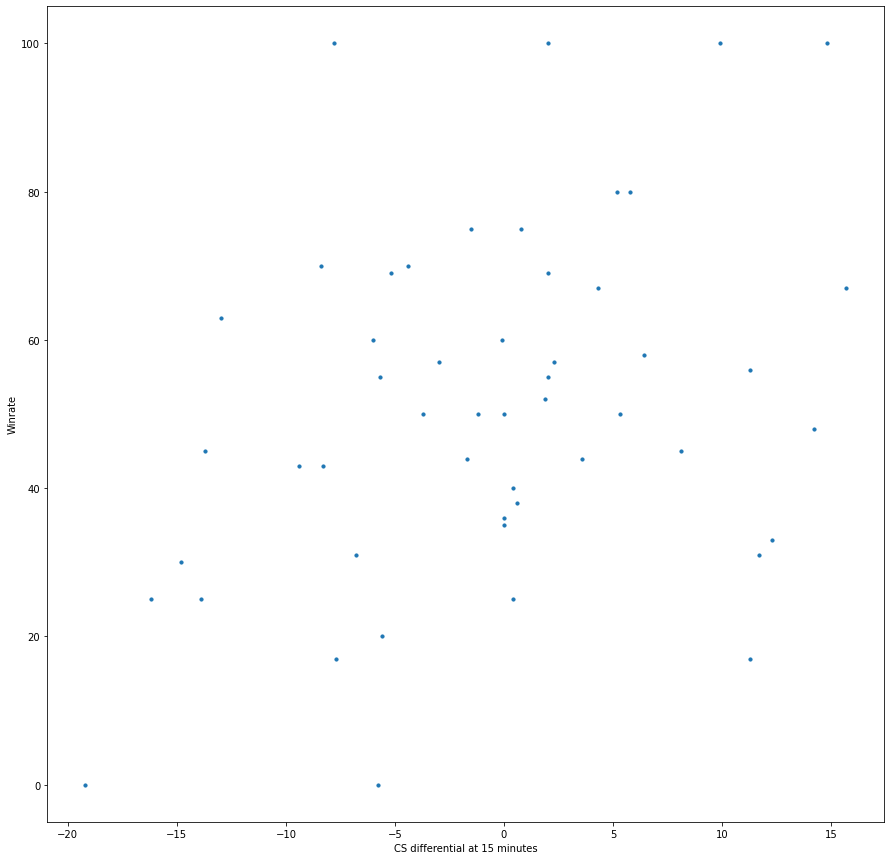

In [17]:
champions_data_world_competition_picks.plot.scatter(x='CS differential at 15 minutes', y = 'Winrate', s = 10, figsize =(15, 15))

From above graph, cs differential and gold differential are pretty much same. This agian strongly prove that cs and gold have strong correlation even though we remove apart of data. Finally, the graph have shown that the gold differential in the game and win rate have a correlation. At this point, we know that the gold will effect the win rate. We come up with new question. What champion has most gold advantage?

These are the table for the data we used above. After we determine the correlation betweeen gold and win rate. We decide to find out which champion has the highest gold advantage.

In [18]:
champions_data.head()

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold
0,1,Kai'Sa,"5,043,800",2.47:1,49.92,24.65%,6.99%,197.14,12384
1,2,Miss Fortune,"4,866,151",2.36:1,51.91,23.78%,19.37%,178.82,12026
2,3,Caitlyn,"4,154,060",2.25:1,49.49,20.30%,14.35%,186.79,12191
3,4,Lux,"3,737,410",2.55:1,50.47,18.27%,10.47%,77.28,9830
4,5,Ezreal,"3,584,686",2.46:1,48.66,17.52%,4.09%,181.21,11854


We sort the data by "gold",which is gold per game , to see which champion obtain the most gold in the game. In other term, we want to see the avatange of gold for each champion.

In [19]:
champions_data = champions_data.sort_values(by = 'Gold', ascending=False)
champions_data

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold
71,72,Gangplank,"1,147,075",2:01,48.47,5.61%,4.27%,198.33,13731
74,75,Draven,"1,097,575",2.07:1,49.33,5.36%,14.64%,182.04,13622
29,30,Samira,"2,018,133",2.27:1,51.11,9.86%,25.68%,183.73,13091
133,134,Karthus,"525,634",2.36:1,49.30,2.57%,0.88%,188.45,13027
14,15,Tristana,"2,556,052",2.34:1,51.21,12.49%,5.69%,182.62,12935
...,...,...,...,...,...,...,...,...,...
40,41,Nautilus,"1,677,570",2.27:1,49.00,8.20%,10.69%,37.19,7742
150,151,Braum,"370,149",2.51:1,48.02,1.81%,0.24%,34.75,7679
96,97,Janna,"787,247",3.13:1,51.54,3.85%,0.87%,17.68,7668
119,120,Alistar,"598,156",2.39:1,48.91,2.92%,0.66%,35.82,7646


<BarContainer object of 162 artists>

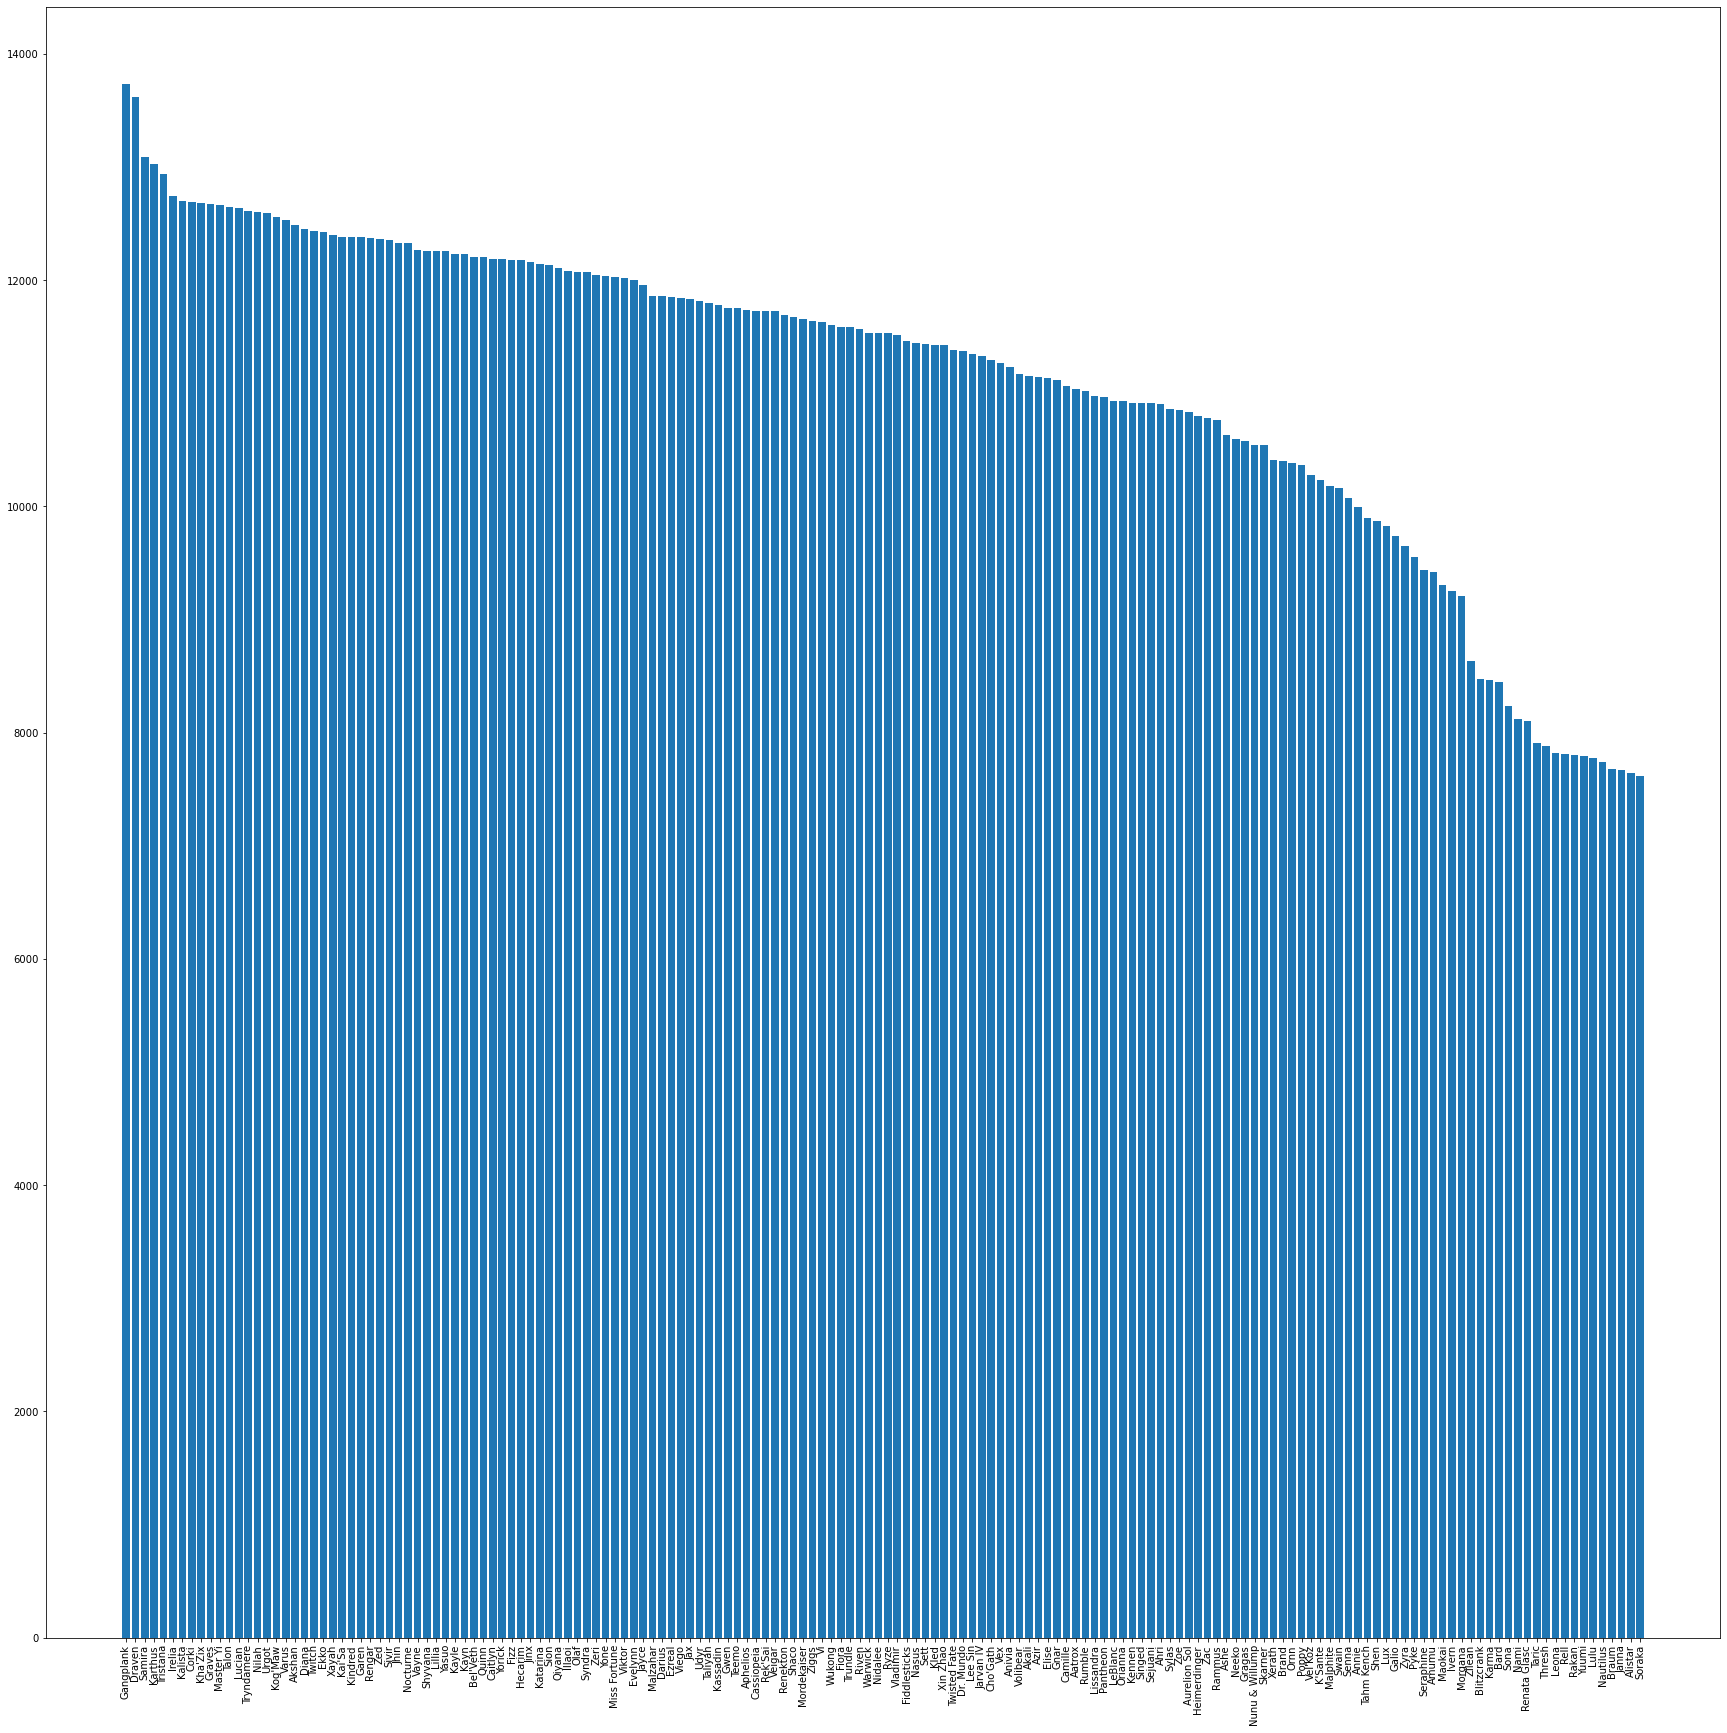

In [20]:
plt.figure(figsize =(30, 30))
bar_plot_gold = plt.bar(champions_data['Champion'], champions_data['Gold'])
plt.xticks(rotation=90)
bar_plot_gold

Next, we are going to find gold advantage of champion with specific lane. In order to find gold advantage of champion in specific lane, we try to merge the data with specific lane of champion

In [33]:
top_gold_advantage = pandas.merge(champions_data, top_lane_champion, how='inner', left_on='Champion', right_on='Champion')
top_gold_advantage = top_gold_advantage.sort_values(by = 'Gold', ascending= False)
top_gold_advantage.iloc[:10]

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold,Rank,Tier,Win Rate,Pick Rate,Ban Rate,Column1
0,72,Gangplank,"1,147,075",2:01,48.47,5.61%,4.27%,198.33,13731,NaN,3,0.4861,0.0666,0.0550,NaN
1,35,Irelia,"1,913,633",1.73:1,50.29,9.35%,16.34%,209.21,12744,NaN,2,0.4997,0.0531,0.0881,NaN
2,101,Tryndamere,"721,138",1.77:1,48.76,3.52%,3.44%,198.88,12615,NaN,3,0.5000,0.0222,0.0176,NaN
3,103,Urgot,"705,409",1.96:1,51.49,3.45%,1.51%,192.16,12593,NaN,2,0.5142,0.0234,0.0043,NaN
4,117,Akshan,"635,687",2.06:1,49.82,3.11%,3.61%,173.53,12485,NaN,3,0.5049,0.0111,0.0137,NaN
5,38,Garen,"1,809,489",2.14:1,51.55,8.84%,3.96%,191.37,12379,NaN,2,0.5083,0.0532,0.0179,NaN
6,116,Rengar,"637,457",2.14:1,48.49,3.12%,1.72%,158.70,12369,NaN,3,0.5132,0.0104,0.0104,NaN
7,33,Vayne,"1,970,009",1.88:1,48.82,9.63%,9.79%,176.89,12267,NaN,5,0.4751,0.0156,0.0153,NaN
8,83,Lillia,"985,478",2.49:1,51.13,4.82%,2.25%,179.96,12259,NaN,5,0.4916,0.0058,0.0019,NaN
9,9,Yasuo,"2,852,944",1.67:1,49.05,13.94%,22.86%,193.71,12256,NaN,5,0.4713,0.0166,0.0237,NaN


These are the top 10 of top lane champion with highest gold advantage in a game
top_lane_champion = pandas.read_csv('Top Lane Champion .csv')
mid_lane_champion = pandas.read_csv('Middle_Lane_Champion.csv')
ad_champion = pandas.read_csv('AD Champion.csv')
sup_champion = pandas.read_csv('Support Champion.csv')
jungle_champion = pandas.read_csv('Jungle Champion.csv')

In [22]:
mid_gold_advantage = pandas.merge(champions_data, mid_lane_champion, how='inner', left_on='Champion', right_on='Champion')
mid_gold_advantage = mid_gold_advantage.sort_values(by = 'Gold',, ascending= False)
mid_gold_advantage.iloc[:10]

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold,Rank,Tier,Win Rate,Pick Rate,Ban Rate
53,114,Zilean,"644,996",3.1:1,51.67,3.15%,1.14%,54.93,8636,530,4,0.5203,0.0057,0.0029
52,66,Seraphine,"1,254,275",2.56:1,50.40,6.13%,1.86%,73.47,9440,31-1,5,0.4851,0.0055,0.0012
51,130,Galio,"549,887",2.48:1,49.76,2.69%,0.38%,127.69,9736,127,3,0.5125,0.0287,0.0030
50,4,Lux,"3,737,410",2.55:1,50.47,18.27%,10.47%,77.28,9830,220,3,0.5012,0.0260,0.0045
49,144,Annie,"419,915",2.1:1,45.99,2.05%,0.58%,120.53,9999,51,5,0.4754,0.0094,0.0017
48,46,Swain,"1,584,458",2.39:1,51.73,7.74%,4.39%,90.54,10161,340,2,0.5258,0.0200,0.0053
47,99,Vel'Koz,"748,342",2.33:1,51.54,3.66%,0.69%,91.08,10277,44-3,4,0.5183,0.0101,0.0010
46,53,Xerath,"1,484,150",2.71:1,51.38,7.25%,7.26%,86.48,10413,483,4,0.5023,0.0201,0.0112
45,121,Gragas,"583,990",2.29:1,47.44,2.85%,0.30%,147.72,10580,150,4,0.5133,0.0081,0.0009
44,128,Neeko,"554,914",2.2:1,50.70,2.71%,0.49%,126.64,10599,240,5,0.4896,0.0079,0.0008


These are the top 10 of mid lane champion with highest gold advantage in a game

In [23]:
ad_gold_advantage = pandas.merge(champions_data, ad_champion, how='inner', left_on='Champion', right_on='Column2')
ad_gold_advantage = ad_gold_advantage.sort_values(by = 'Gold',, ascending= False)
ad_gold_advantage.iloc[:10]

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold,Column1,Column2,Column3,Column4,Column5,Column6,Column7
24,66,Seraphine,"1,254,275",2.56:1,50.40,6.13%,1.86%,73.47,9440,161,Seraphine,2,0.5495,0.0104,0.0022,NaN
23,11,Ashe,"2,798,942",2.35:1,49.86,13.68%,3.54%,127.36,10630,20,Ashe,3,0.4938,0.0756,0.0151,NaN
22,131,Ziggs,"549,286",2.38:1,50.62,2.68%,0.23%,174.31,11636,250,Ziggs,4,0.5290,0.0078,0.0005,NaN
21,76,Aphelios,"1,091,428",1.92:1,44.78,5.33%,0.90%,184.07,11738,10,Aphelios,5,0.4445,0.0715,0.0078,NaN
20,5,Ezreal,"3,584,686",2.46:1,48.66,17.52%,4.09%,181.21,11854,51,Ezreal,2,0.4944,0.1824,0.0328,NaN
19,2,Miss Fortune,"4,866,151",2.36:1,51.91,23.78%,19.37%,178.82,12026,13-1,Miss Fortune,2,0.5015,0.1180,0.0678,NaN
18,157,Zeri,"217,061",2.05:1,42.82,1.06%,0.60%,183.80,12042,240,Zeri,5,0.4192,0.0070,0.0021,NaN
17,22,Jinx,"2,160,770",2.3:1,49.99,10.56%,0.87%,190.39,12162,70,Jinx,1,0.5175,0.0834,0.0034,NaN
16,3,Caitlyn,"4,154,060",2.25:1,49.49,20.30%,14.35%,186.79,12191,30,Caitlyn,1,0.4996,0.1970,0.1726,NaN
15,9,Yasuo,"2,852,944",1.67:1,49.05,13.94%,22.86%,193.71,12256,230,Yasuo,5,0.4787,0.0072,0.0104,NaN


These are the top 10 of bottom lane for ad champion with highest gold advantage in a game

In [24]:
sup_gold_advantage = pandas.merge(champions_data, sup_champion, how='inner', left_on='Champion', right_on='Column2')
sup_gold_advantage = sup_gold_advantage.sort_values(by = 'Gold',, ascending= False)
sup_gold_advantage.iloc[:10]

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold,Column1,Column2,Column3,Column4,Column5,Column6
38,64,Soraka,"1,286,893",2.73:1,50.53,6.29%,2.30%,19.05,7621,28-2,Soraka,2,0.5084,0.0648,0.0299
37,120,Alistar,"598,156",2.39:1,48.91,2.92%,0.66%,35.82,7646,10,Alistar,4,0.4955,0.0291,0.0061
36,97,Janna,"787,247",3.13:1,51.54,3.85%,0.87%,17.68,7668,90,Janna,2,0.5228,0.0558,0.0200
35,151,Braum,"370,149",2.51:1,48.02,1.81%,0.24%,34.75,7679,70,Braum,4,0.4931,0.0227,0.0021
34,41,Nautilus,"1,677,570",2.27:1,49.00,8.20%,10.69%,37.19,7742,18-1,Nautilus,2,0.4934,0.0890,0.1140
33,43,Lulu,"1,621,721",2.94:1,48.43,7.93%,7.73%,18.49,7778,121,Lulu,2,0.4834,0.1131,0.1393
32,26,Yuumi,"2,136,757",4.07:1,46.29,10.44%,24.25%,7.60,7794,36-1,Yuumi,2,0.4800,0.1118,0.4157
31,132,Rakan,"533,184",2.72:1,49.03,2.61%,0.22%,36.22,7801,21-1,Rakan,4,0.4851,0.0322,0.0017
30,156,Rell,"293,746",2.42:1,51.24,1.44%,0.35%,34.55,7810,220,Rell,3,0.5197,0.0191,0.0036
29,50,Leona,"1,544,046",2.36:1,50.15,7.55%,8.43%,35.58,7816,2-Nov,Leona,3,0.4956,0.0542,0.0484


These are the top 10 of bottom lane for support champion with highest gold advantage in a game

In [25]:
jungle_gold_advantage = pandas.merge(champions_data, jungle_champion, how='inner', left_on='Champion', right_on='Champion')
jungle_gold_advantage = jungle_gold_advantage.sort_values(by = 'Gold', ascending= False)
jungle_gold_advantage.iloc[:10]

,#,Champion,Games played,KDA,Win rate,Pick ratio per game,Ban ratio per game,CS,Gold,Rank,Tier,Win Rate,Pick Rate,Ban Rate
47,14,Blitzcrank,"2,586,637",2.5:1,51.39,12.64%,33.52%,53.77,8477,30,5,0.4386,0.0084,0.0296
46,161,Ivern,"127,397",2.98:1,47.39,0.62%,0.32%,112.35,9256,1-Dec,4,0.4949,0.0061,0.0012
45,32,Maokai,"1,987,615",2.53:1,51.50,9.71%,4.66%,102.17,9304,20-1,3,0.5135,0.0163,0.0067
44,20,Amumu,"2,242,068",2.35:1,52.47,10.96%,12.49%,87.84,9424,13,2,0.5212,0.0193,0.0323
43,108,Poppy,"669,158",2.44:1,48.95,3.27%,1.51%,134.71,10366,28-1,4,0.4800,0.0178,0.0107
42,160,Skarner,"139,417",2.75:1,50.79,0.68%,0.10%,144.23,10541,36-2,3,0.5255,0.0060,0.0005
41,118,Nunu & Willump,"631,385",2.74:1,48.90,3.09%,0.79%,135.36,10545,25-7,2,0.5147,0.0289,0.0079
40,121,Gragas,"583,990",2.29:1,47.44,2.85%,0.30%,147.72,10580,91,4,0.4900,0.0097,0.0011
39,88,Rammus,"945,907",2.83:1,51.50,4.62%,8.89%,136.77,10760,30-1,1,0.5297,0.0360,0.0704
38,77,Zac,"1,090,871",3.38:1,51.84,5.33%,2.33%,139.30,10782,471,2,0.5120,0.0475,0.0295


These are the top 10 of jungle champion with highest gold advantage in a game

Player Stats for League of Legends World Championship 2022 Play-ins

We wanted to figure out who the best players were in this year's play-ins, so we found the average rank of each categorical stat for players (higher is better for most statistics in this game).

We had to separate the player stats for each role because each plays a significant part in the team and there is no "carry" per se for this game. It is kinda like American Football where each position matters and one position DOES NOT rule all. 

In [26]:
import pandas
play_ins_stats = pandas.read_csv('Player stats Worlds 2022 play ins.csv')
# Replace all dashes with 0's
play_ins_stats = play_ins_stats.replace('-', 0)

# convert dataframes with percentages to decimals and float values
play_ins_stats['Win rate'] = play_ins_stats['Win rate'].str.rstrip('%').astype(float) / 100
play_ins_stats['KP%'] = play_ins_stats['KP%'].str.rstrip('%').astype(float) / 100
play_ins_stats['DMG%'] = play_ins_stats['DMG%'].astype(float) / 100
play_ins_stats['FB %'] = play_ins_stats['FB %'].str.rstrip('%').astype(float) / 100
play_ins_stats['FB Victim'] = play_ins_stats['FB Victim'].str.rstrip('%').astype(float) / 100

# convert all numerical dataframes to float values
play_ins_stats.iloc[:, 3:25] = play_ins_stats.iloc[:, 3:25].astype(float)

Top TOP LANE players during LoL World Championship 2022 play-ins

In [27]:
# Create dataframe for top lane players ONLY
play_ins_top_stats = play_ins_stats.copy()[play_ins_stats.copy()['Position'].str.contains('TOP')]

# Convert relevant top lane dataframe columns as float values
play_ins_top_stats = play_ins_top_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
play_ins_top_stats = play_ins_top_stats[play_ins_top_stats.Games > 1]

# Top player is kingen
play_ins_top_stats['Rank'] = play_ins_top_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

# Sort by rank
top_rankings = play_ins_top_stats[['Player', 'Rank']]
top_rankings = top_rankings.sort_values(by='Rank')
top_rankings

,Player,Rank
25,Impact,1.0
7,Breathe,2.0
60,kingen,3.0
55,Wunder,4.0
2,Armut,5.0
33,Likai,6.0
20,Hasmed,7.0
41,Robo,8.0
12,Evi,9.0
44,StarScreen,10.0


Top Jungle players durng LoL World Championship 2022 play-ins

In [28]:
# Create dataframe for jungle lane players ONLY
play_ins_jungle_stats = play_ins_stats.copy()[play_ins_stats.copy()['Position'].str.contains('JUNGLE')]

# Convert relevant jungle lane dataframe columns as float values
play_ins_jungle_stats = play_ins_jungle_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
play_ins_jungle_stats = play_ins_jungle_stats[play_ins_jungle_stats.Games > 1]

# Top player is Juhan
play_ins_jungle_stats['Rank'] = play_ins_jungle_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

jungle_rankings = play_ins_jungle_stats[['Player', 'Rank']]
jungle_rankings = jungle_rankings.sort_values(by='Rank')
jungle_rankings

,Player,Rank
26,Inspired,1.0
54,Wei,2.0
28,Juhan,3.0
37,Pyosik,4.0
11,Elyoya,5.0
22,HuSha,6.0
39,Razork,7.0
45,Steal,8.0
9,Croc,9.0
4,BeanJ,10.0


Top Mid players during LoL World Championship 2022 play-ins

In [29]:
# Create dataframe for mid lane players ONLY
play_ins_mid_stats = play_ins_stats.copy()[play_ins_stats.copy()['Position'].str.contains('MID')]

# Convert relevant mid lane dataframe columns as float values
play_ins_mid_stats = play_ins_mid_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
play_ins_mid_stats = play_ins_mid_stats[play_ins_mid_stats.Games > 1]

# Top player is Zeka
play_ins_mid_stats['Rank'] = play_ins_mid_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

mid_rankings = play_ins_mid_stats[['Player', 'Rank']]
mid_rankings = mid_rankings.sort_values(by='Rank')
mid_rankings

,Player,Rank
58,Zeka,1.0
62,xiaohu,2.0
23,Humanoid,3.0
59,jojopyun,4.0
35,Minji,5.0
48,Tinowns,6.0
36,Nisqy,7.0
56,Yaharong,8.0
15,Froggy,9.0
42,Serin,10.0


Top Bot players during LoL World Championship 2022 play-ins

In [30]:
# Create dataframe for bot lane players ONLY
play_ins_adc_stats = play_ins_stats.copy()[play_ins_stats.copy()['Position'].str.contains('ADC')]

# Convert relevant bot lane dataframe columns as float values
play_ins_adc_stats = play_ins_adc_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
play_ins_adc_stats = play_ins_adc_stats[play_ins_adc_stats.Games > 1]

# Top player is Deft
play_ins_adc_stats['Rank'] = play_ins_adc_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

adc_rankings = play_ins_adc_stats[['Player', 'Rank']]
adc_rankings = adc_rankings.sort_values(by='Rank')
adc_rankings

,Player,Rank
51,Upset,1.0
10,Deft,2.0
16,GALA,3.0
30,Kaori,4.0
43,Shogun,5.0
53,Wako,6.0
50,UNF0RGIVEN,7.0
57,Yutapon,8.0
6,Brance,9.0
21,Holyphoenix,10.0


Top Support players during LoL World Championship 2022 play-ins

In [31]:
# Create dataframe for support lane players ONLY
play_ins_supp_stats = play_ins_stats.copy()[play_ins_stats.copy()['Position'].str.contains('SUPPORT')]

# Convert relevant support lane dataframe columns as float values
play_ins_supp_stats = play_ins_supp_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
play_ins_supp_stats = play_ins_supp_stats[play_ins_supp_stats.Games > 1]

# Top player is Beryl
play_ins_supp_stats['Rank'] = play_ins_supp_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

supp_rankings = play_ins_supp_stats[['Player', 'Rank']]
supp_rankings = supp_rankings.sort_values(by='Rank')
supp_rankings

,Player,Rank
5,BeryL,1.0
52,Vulcan,2.0
34,Ming,3.0
46,Taki,4.0
19,Harp,5.0
8,Ceos,6.0
29,Kaiser,7.0
24,Hylissang,8.0
31,Kino,9.0
1,Aladoric,10.0


Top TOP LANE players during Worlds 2022

In [32]:
worlds_stats = pandas.read_csv('worlds_stats_22.csv')

# Replace all dashes with 0's
worlds_stats = worlds_stats.replace('-', 0)

# convert dataframes with percentages to decimals and float values
worlds_stats['Win rate'] = worlds_stats['Win rate'].str.rstrip('%').astype(float) / 100
worlds_stats['KP%'] = worlds_stats['KP%'].str.rstrip('%').astype(float) / 100
worlds_stats['DMG%'] = worlds_stats['DMG%'].astype(float) / 100
worlds_stats['FB %'] = worlds_stats['FB %'].str.rstrip('%').astype(float) / 100
worlds_stats['FB Victim'] = worlds_stats['FB Victim'].str.rstrip('%').astype(float) / 100

# convert all numerical dataframes to float values
worlds_stats.iloc[:, 3:25] = worlds_stats.iloc[:, 3:25].astype(float)

# Create dataframe for top lane players ONLY
worlds_top_stats = worlds_stats.copy()[worlds_stats.copy()['Position'].str.contains('TOP')]

# Convert relevant top lane dataframe columns as float values
worlds_top_stats = worlds_top_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
worlds_top_stats = worlds_top_stats[worlds_top_stats.Games > 1]

# Top player is Zeus
worlds_top_stats['Rank'] = worlds_top_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

# Sort by rank
worlds_top_rankings = worlds_top_stats[['Player', 'Rank']]
worlds_top_rankings = worlds_top_rankings.sort_values(by='Rank')
worlds_top_rankings


FileNotFoundError: [Errno 2] No such file or directory: 'worlds_stats_22.csv'

Top Jungle players during Worlds 2022

In [ ]:
# Create dataframe for jungle lane players ONLY
worlds_jungle_stats = worlds_stats.copy()[worlds_stats.copy()['Position'].str.contains('JUNGLE')]

# Convert relevant jungle lane dataframe columns as float values
worlds_jungle_stats = worlds_jungle_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
worlds_jungle_stats = worlds_jungle_stats[worlds_jungle_stats.Games > 1]

# Top player is Oner
worlds_jungle_stats['Rank'] = worlds_jungle_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

worlds_jungle_rankings = worlds_jungle_stats[['Player', 'Rank']]
worlds_jungle_rankings = worlds_jungle_rankings.sort_values(by='Rank')
worlds_jungle_rankings

Top Mid players during Worlds 2022

In [ ]:
# Create dataframe for mid lane players ONLY
worlds_mid_stats = worlds_stats.copy()[worlds_stats.copy()['Position'].str.contains('MID')]

# Convert relevant mid lane dataframe columns as float values
worlds_mid_stats = worlds_mid_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
worlds_mid_stats = worlds_mid_stats[worlds_mid_stats.Games > 1]

# Top player is Faker
worlds_mid_stats['Rank'] = worlds_mid_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

worlds_mid_rankings = worlds_mid_stats[['Player', 'Rank']]
worlds_mid_rankings = worlds_mid_rankings.sort_values(by='Rank')
worlds_mid_rankings

Top Bot players during LoL World Championship 2022 play-ins

In [ ]:
# Create dataframe for bot lane players ONLY
worlds_adc_stats = worlds_stats.copy()[worlds_stats.copy()['Position'].str.contains('ADC')]

# Convert relevant bot lane dataframe columns as float values
worlds_adc_stats = worlds_adc_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
worlds_adc_stats = worlds_adc_stats[worlds_adc_stats.Games > 1]

# Top player is Gumayusi
worlds_adc_stats['Rank'] = worlds_adc_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

worlds_adc_rankings = worlds_adc_stats[['Player', 'Rank']]
worlds_adc_rankings = worlds_adc_rankings.sort_values(by='Rank')
worlds_adc_rankings

Top Support players during LoL World Championship 2022 play-ins

In [ ]:
# Create dataframe for support lane players ONLY
worlds_supp_stats = worlds_stats.copy()[worlds_stats.copy()['Position'].str.contains('SUPPORT')]

# Convert relevant support lane dataframe columns as float values
worlds_supp_stats = worlds_supp_stats.drop(['Avg kills', 'Avg deaths', 'Avg assists'], axis=1)
# Get rid of players that only played 1 game
worlds_supp_stats = worlds_supp_stats[worlds_supp_stats.Games > 1]

# Top player is Keria
worlds_supp_stats['Rank'] = worlds_supp_stats.iloc[:, 5:22].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(float)

worlds_supp_rankings = worlds_supp_stats[['Player', 'Rank']]
worlds_supp_rankings = worlds_supp_rankings.sort_values(by='Rank')
worlds_supp_rankings

**Research Question**: What is the correlation between win rate and player rankings by stats? 

We wanted to find out if player rankings with stats like KDA, gold per minute, CS per minute, damage per minute, etc. had any correlation on the win rate of teams at Worlds 2022. So we just averaged out the stats mentioned above, and ranked each player in each role based on those averages. The averages for each team's player's rank and their team's placement at Worlds 2022 is fairly accurate to each other.

**Placement at Worlds**:
1. DRX
2. T1
3. JDG/GENG
4. JDG/GENG
5. DWG/EDG/RNG/Rogue
6. DWG/EDG/RNG/Rogue
7. DWG/EDG/RNG/Rogue
8. DWG/EDG/RNG/Rogue
9. Fnatic/Top
10. Fnatic/Top
11. EG/G2/100T/Flying Oyster
12. EG/G2/100T/Flying Oyster
13. EG/G2/100T/Flying Oyster
14. EG/G2/100T/Flying Oyster
15. C9/GAM
16. C9/GAM

**Average Rank of Player's Stats**:
1. T1
2. GenG
3. DRX
4. DWG
5. EDG
6. RNG
7. Top
8. JDG
9. Rogue
10. Fnatic
11. G2
12. 100T
13. EG
14. GAM
15. C9
16. Flying Oyster

**Remarks**: 
As you can see above, each team's average rank of player stats and the team's placement seem to only deviate 1-2 places from each other when you compare the two together. So it seems that stats play somewhat of a part in team placement's rankings and having just one teammate near the bottom of their role, can throw a team's placement off in a tournament. The only outlier would be JDG, where they placed top 4, but it seems their player's stats averages are 8th overall. It seems that JDG outperformed their placement based on the stats.

As expected, the top teams seem to have their players dominate the top of their roles, while the bottom teams' players anchor the bottom of the stats in their roles.

**Research Question**: What other factors are critical to winning or losing a match in world championship 2022?

For Cycle 2, Our team thought of other factors that are important to the game in world championship 2022. Vision is something we did not consider in our last data science cycle. The use of ward increases the field of view of a team so that the team can see more of the map. This increases the amount of information available to the team to make their next move. So our team collected data on ward placement and found the relevant heatmap. 
    

![ward.png](attachment:ward.png)


According to the heatmaps we obtained, our team found that in the world championship, in the average of all games, the blue side always had a higher vision score than the red side, because on average the blue side placed 11 more wards that the red side did. This is because of the tri-bush advantage. Bottom is a much more important role in determining the outcome of a game. Blue side is stronger because tri bush allows them to safely get vision. And according to the data from the website, in the Worlds 2022, the blue side had a 52.5% win rate. This holds true in soloq as well. Also, in the other championship,"EU Masters Spring", the blue team has lesser win rate than red team, and the red team has more wards than blue team. There are many other heatmaps that can prove that there are relationship between ward and win rate. Therefore, our team concluded the correlation between the ward and the win rate. The ward and vision are the key parts that affect the win rate of the game. 

   **Research Question**: What is the correlation between the dragon and the win rate in the world championshiop 2022?

   For Cycle 2, our group decided to explore more data that would affect the win rate, so we looked at the relevant data. The first thing our team noticed about the game is that in addition to minions, heroes, and monsters, there is a special branch of monsters, and that is dragons.
   
   In League of Legends, dragons are also a key part of the game. During the game, players and teams will fight for this resource at certain times or situations, and will engage in team battles to obtain this particular resource. The dragon is a special resource that gives all the characters on a team who kill the dragon some special buffs. So our group started to think about whether the rate of dragon acquisition is also a key factor in the game's win rate. Our group decided to study the impact on the win rate and correlation based on the data of the world championship 2022 for the first dragon fight in the game.

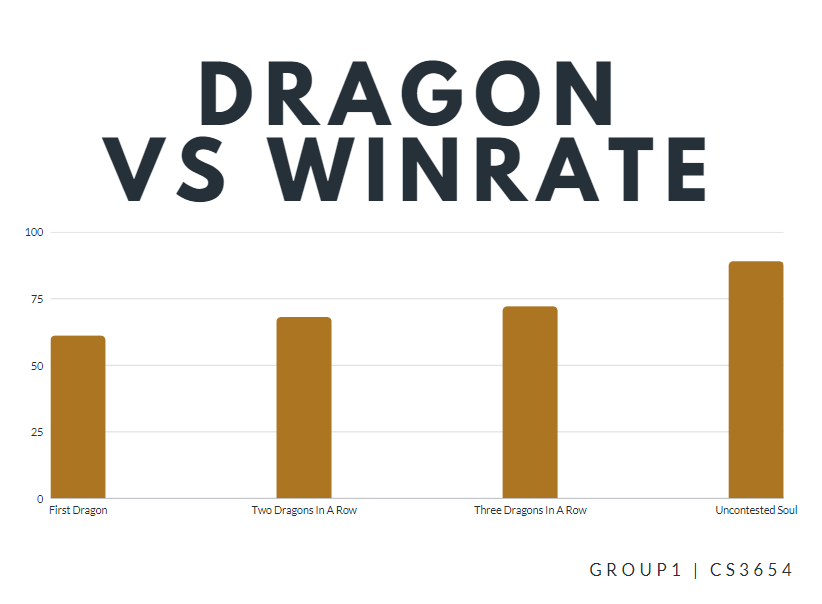


Winning first dragon gave the team that won 61% chance of winning. The buff gives the team that claims the dragon an advantage. Moreover, they likely won a team fight which means their team might claim a 1000-1500 gold advantage. We gathered data by downloading the replay file (ROFL) for league and dumped the data. In Worlds 2022, winrate spiked for games where dragons went uncontested. 

Credit listing 
Rongtian Yue - Worked on all parts and assisted members with parts when necessary. Collected data and helped design the analysis.
Long Phan - Worked on all parts and assisted members with parts when necessary. Collected data and helped design the analysis.
Kam Wai Chan - Worked on all parts and assisted members with parts when necessary. Collected data and helped design the analysis.
Yizhe Liu - Worked on all parts and assisted members with parts when necessary. Collected data and helped design the analysis.